# Support sur les fondamentaux 

## Utilisation de Jupyter Notebook

Le principe est simple : 
 - Chaque notebook est constitué d’une liste de **cellules**
 - Chacune peut contenir du **texte formaté** ou du **code** (Python, dans notre cas)
 - On **exécute** une cellule de code -> le résultat s’affiche sous la cellule

Cliquez sur le menu **Help** > **User Interface Tour** pour un tour rapide de l’interface.    

Pour vous entraîner :
- **Insérez** quelques cellules de code au début du notebook
- Exécutez quelques commandes Python, telles que **print("Hello world!")** :
    - Cliquez dans une cellule de code et saisissez le code à exécuter
    - Exécutez le code de la cellule en tapant Shift-Entrée ou en cliquant sur le bouton d’exécution
    
Lorsque vous **cliquez** à l’intérieur d’une cellule, vous passez en mode **édition** (la cellule est alors encadrée en *vert*). Lorsque vous tapez la **touche Echap** (Esc) ou que vous cliquez juste à gauche de la cellule, vous passez en mode **commande** (la cellule est alors encadrée en *bleu*). 

Lorsque vous êtes en **mode commande**, tapez la **touche H** pour afficher les nombreux **raccourcis clavier** disponibles

## Préparation

Tout d'abord, assurons-nous que ce bloc-notes fonctionne bien en python 3, importons quelques modules communs, assurons-nous que MatplotLib trace des figures :

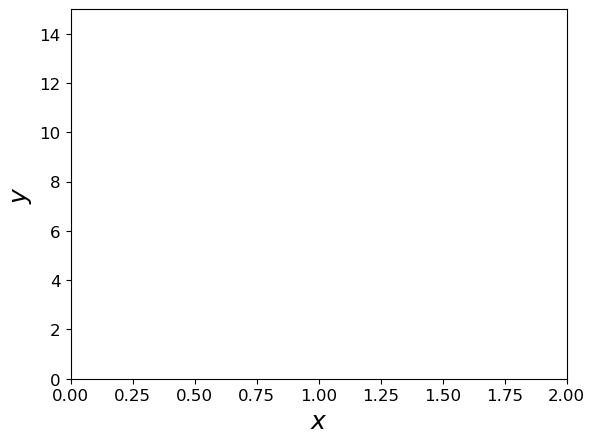

In [1]:
# Pour soutenir à la fois python 2 et python 3
from __future__ import division, print_function, unicode_literals

# Importations communes
import numpy as np
import os

# Pour que la production soit stable d'un bout à l'autre
np.random.seed(42)

# Pour tracer de jolis figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=90, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show() # !!! INDISPENSABLE pour afficher le plot

## Préparation et initialisation

### Chargement des packages

In [2]:
import numpy as np
import sys
import glob
import os

from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn import datasets

### Quelques fonctions

In [3]:
## Calcul de  points de manière inconnue
def computePoints(m):
    e=3
    n=3127
    d=2011
    X = 2*np.random.rand(m, 1) # m valeurs aléatoires de 0 à 2
    y = (pow(64,d) % n) + (pow(27,d) % n) * X + np.random.randn(m, 1) # m valeurs de y coorespondantes à x
    return [X,y]

## Calcul de  points de manière inconnue
def computepolyPoints(m):  
    e=3
    n=3127
    d=2011
    X = 6 * np.random.rand(m, 1) - 3 # 200 valeurs aléatoires de -3 à +3
    y = (pow(216,d) % n) * X**2 + X + (pow(8,d) % n) + np.random.randn(m, 1) # 200 y coorespondants à x
    return [X,y]

## Exemple 1 : Comprendre un modèle linéaire en 2D 

Affichage des points du prix d’une maison en fonction de sa superficie et du revenu des habitants du quartier

Nombre de test m=100 et pour l'instant nombre de paramètre n=1

In [4]:
m=100;
n=2;

In [5]:
[X,y]=computePoints(m)
plt.plot(X, y, "b.")
plt.xlabel("$superficie$", fontsize=18)
plt.ylabel("$prix$", rotation=90, fontsize=18)
plt.axis([0, 2, 0, 15])

(0.0, 2.0, 0.0, 15.0)

Affichage de X et Y

In [6]:
print(X) ###### Trouver comment afficher toutes les valeurs de X et y

[[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]
 [0.04116899]
 [1.9398197 ]
 [1.66488528]
 [0.42467822]
 [0.36364993]
 [0.36680902]
 [0.60848449]
 [1.04951286]
 [0.86389004]
 [0.58245828]
 [1.22370579]
 [0.27898772]
 [0.5842893 ]
 [0.73272369]
 [0.91213997]
 [1.57035192]
 [0.39934756]
 [1.02846888]
 [1.18482914]
 [0.09290083]
 [1.2150897 ]
 [0.34104825]
 [0.13010319]
 [1.89777107]
 [1.93126407]
 [1.6167947 ]
 [0.60922754]
 [0.19534423]
 [1.36846605]
 [0.88030499]
 [0.24407647]
 [0.99035382]
 [0.06877704]
 [1.8186408 ]
 [0.51755996]
 [1.32504457]
 [0.62342215]
 [1.04013604]
 [1.09342056]
 [0.36970891]
 [1.93916926]
 [1.55026565]
 [1.87899788]
 [1.7896547 ]
 [1.19579996]
 [1.84374847]
 [0.176985  ]
 [0.39196572]
 [0.09045458]
 [0.65066066]
 [0.77735458]
 [0.54269806]
 [1.65747502]
 [0.71350665]
 [0.56186902]
 [1.08539217]
 [0.28184845]
 [1.60439396]
 [0.14910129]
 [1.97377387]
 [1.54448954]
 [0.39

Object : calculer une somme pondérée des variables d’entrée + un terme constant :
$prix=\theta_0+\theta_1 \times superficie$


Exemple avec $\theta_0=4$  (ordonnee à l'origine) et $\theta_1=-2$ (pente de la courbe)

Pour afficher la droite, on va afficher un segment AB, avec A le point en x=0 et B le point en x=2.
Pour calculer les ordonnées de A et B, on va utiliser $y=\theta_0+\theta_1\times x$

&rarr; Afficher une droite qui correspond à peu près aux points dans l'exemple ci dessous. Pour l'exemple, $y_a=y_b=8$

In [7]:
theta_0 = [4,-2] ###### Changer ces valeurs et observer le résultat
Xdroite=[0,2]
#Ydroite=[8,8]
Ydroite=[Xdroite[0]*theta_0[1]+theta_0[0], Xdroite[1]*theta_0[1]+theta_0[0]]
plt.plot(X, y, "b.") # Memes points qu'avant
plt.plot(Xdroite, Ydroite, "r-")
plt.axis([0, 2, 0, 15]);

Le code ci-dessous représente la même chose mais avec du code optimisé

## Exemple 2 : Comprendre la notation vectorielle

In [8]:
theta = [4,2] # 4: ordonnee à l'origine et 2 pente de la courbe
X_new = np.array([[0], [2]]) # extremite de la droite x=0 et x=2
X_new_b = np.c_[np.ones((2, 1)), X_new]  # ajout des x0 = 1 pour chaque instance
y_predict = X_new_b.dot(theta)
plt.plot(X, y, "b.") # Memes points qu'avant
plt.plot(X_new, y_predict, "r-")
plt.axis([0, 2, 0, 15]);

Afficher les vecteurs X, Y et theta et donner leur dimension

In [9]:
###### Changer 'essaiVecteur' par les vecteurs à analyser
essaiVecteur=  np.array([[0,3,5], [2,4,9]]) 
print(essaiVecteur)
essaiVecteur.shape

[[0 3 5]
 [2 4 9]]


(2, 3)

## Exemple 3 : Comprendre le calcul du coût

Calcul d'une erreur : 

$erreur=y^0-h(x^0)$

$erreur=y^0-(\theta_0+\theta_1 \times x^0_1))$

In [10]:
essaiY=48
essaiX=56
###### Changer 'essaiX'  et 'essaiY' par la 5ème valeurs du couple (X,Y)
erreur=essaiY-(theta[0]+theta[1]*essaiX)
print(erreur)

-68


Affichage de l'erreur : segment qui va de $A(x^0,y^0)$ à $B(x^0,y^0+erreur)$

In [11]:
A=[X[0],y[0]]
B=[X[0],y[0]-erreur]
Xline=[A[0],B[0]]
Yline=[A[1],B[1]]
plt.plot(X, y, "b.") # Memes points qu'avant
plt.plot(Xline, Yline, "g-") 
plt.axis([0, 2, 0, 15]);

Boucle sur tous les points

In [12]:
theta = [5,2] 
X_new = np.array([[0], [2]]) # extremite de la droite x=0 et x=2
X_new_b = np.c_[np.ones((2, 1)), X_new]  # ajout des x0 = 1 pour chaque instance
y_predict = X_new_b.dot(theta)
plt.plot(X, y, "b.") # Memes points qu'avant
plt.plot(X_new, y_predict, "r-")
print(theta)
plt.axis([0, 2, 0, 15]);
for i in range(1, m):
    ###### Mettre ici le vrai affichage de l'erreur
    A=[X[0],y[0]]
    # ...
    

[5, 2]


Calculer la somme de tous ces segments

In [13]:
somme=0
for i in range(1, m):
    ###### Mettre ici le vrai calcul de l'erreur
    somme+=abs(erreur)
print(somme/m*100)    

6731.999999999999


## Exemple 4 : Expérimenter la loi normale

L'objectif ici est de faire varier le nombre de données de test m et voir l'importance sur le temps de calcul

In [14]:
from datetime import timedelta
import time
from sklearn.linear_model import LinearRegression


m=int(1e7) ###### Valeur à changer (si ca prend trop de temps stopper avec le bouton "stop")
[X,y]=computePoints(m)

start_time = time.perf_counter()
################
lin_reg = LinearRegression()
lin_reg.fit(X, y)
################
end_time = time.perf_counter()
print(end_time - start_time,"secondes")

theta=[lin_reg.intercept_[0],lin_reg.coef_[0][0]]
y_predict = X_new_b.dot(theta)
plt.plot(X, y, "b.") # Memes points qu'avant
plt.plot(X_new, y_predict, "r-")


0.12219370901584625 secondes


- Le maximum obtenu est avec **XXX** données de test pour **XXX secondes** avec une **régression linéaire**
- Le maximum obtenu est avec **XXX** données de test pour **XXX secondes** avec **la loi normale**

## Exemple 5 : Comprendre les hyperparamètres des méthodes fonctionnant avec un m élevé 

### Descente de gradient stochastique

L'objectif ici est de faire varier le nombre de données de test m et voir l'importance sur le temps de calcul

0.007199584040790796 secondes


/opt/anaconda3/envs/deepLearningEnv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


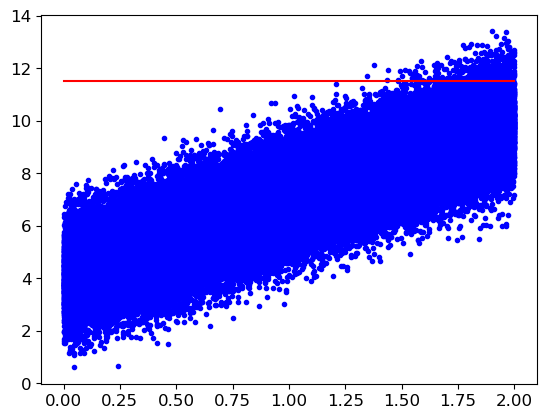

In [26]:
from sklearn.linear_model import SGDRegressor

m=int(1e5) ###### Essayer avec la valeur limite de l'exercice précédent 
[X,y]=computePoints(m)

start_time = time.perf_counter()
################
sgd_reg = SGDRegressor(max_iter=1, penalty=None, eta0=20)
sgd_reg.fit(X, y.ravel())
################
end_time = time.perf_counter()

print(end_time - start_time,"secondes")

theta=[lin_reg.intercept_[0],lin_reg.coef_[0][0]]
y_predict = X_new_b.dot(theta)
X_new = np.array([[0], [2]]) # extremite de la droite x=0 et x=2
X_new_b = np.c_[np.ones((2, 1)), X_new]  # ajout des x0 = 1 pour chaque instance
plt.plot(X, y, "b.") # Memes points qu'avant
plt.plot(X_new, y_predict, "r-")
plt.show()

Avec un **n** petit (ici $n=1$) qui est plus rapide quand **m** est grand ?

Faire varier maintenant le nombre d'itération (```max_iter```) sur une donnée et le taux d'apprentissage (```eta0=0.1```). Que se passe-y-il ?

In [27]:
from sklearn.linear_model import SGDRegressor

m=1000
[X,y]=computePoints(m)

start_time = time.perf_counter()
################
sgd_reg = SGDRegressor(max_iter=1000000000, penalty=None, eta0=0.000001)
sgd_reg.fit(X, y.ravel())
################
end_time = time.perf_counter()
print(end_time - start_time,"secondes")

theta=[sgd_reg.intercept_,sgd_reg.coef_]
y_predict = X_new_b.dot(theta)
plt.plot(X, y, "b.") # Memes points qu'avant
plt.plot(X_new, y_predict, "r-")
print(theta)

0.18728458404075354 secondes
[array([1.05598385]), array([1.19938342])]


### Descente de gradient par mini bash

Faire varier le nombre d'itération sur un jeu de données, le nombre de données de test à utiliser à chaque *epoch* et le taux d'apprentissage. Que se passe-y-il ?

In [28]:
from sklearn.linear_model import SGDRegressor

m=1000
[X,y]=computePoints(m)

start_time = time.perf_counter()
################
sgd_reg = SGDRegressor(max_iter=1, random_state=1, penalty=None, eta0=4.2)
sgd_reg.fit(X, y.ravel())
################
end_time = time.perf_counter()
print(end_time - start_time,"secondes")

theta=[sgd_reg.intercept_,sgd_reg.coef_]
y_predict = X_new_b.dot(theta)
plt.plot(X, y, "b.") # Memes points qu'avant
plt.plot(X_new, y_predict, "r-")
print(theta)

0.0023287080111913383 secondes
[array([-275.84722947]), array([-12010.65921517])]


/opt/anaconda3/envs/deepLearningEnv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Lequel des 2 algorythmes semble le plus précis ?

## Exemple 5 : Comprendre la régression polynomiale

Changer le degré du polynome ci-dessous pour avoir une bonne correspondance

In [29]:
## Calcul et affichage des points
m=300
[X,y]=computepolyPoints(m)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-6, 6, -2, 100])

## Transformation des données d'apprentissage en polynôme
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=50, include_bias=False)
X_poly = poly_features.fit_transform(X)

## Regression linéire sur ce polynôme
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Affichage du résultat 
X_new=np.linspace(-3, 3, m).reshape(m, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

## Exemple 6 : Comprendre les courbes d'apprentissage

Un courbe d'apprentissage affiche la précision (**RMSE**) en fonction du nombre de données d'apprentissage utilisé (**m**)

La fonction ci-dessous dessine les courbes d'apprentissage

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14) 
    #plt.axis([0, 200, -0.1, 2])

Exemple avec le cas d'avant ci-dessous. Faire varier le degré du polynôme à nouveau

In [31]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)